In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SimpleRNN
import os


from kerastuner.tuners import RandomSearch
from tensorflow.keras.callbacks import History

C:\Users\jaysh\AppData\Local\Temp\ipykernel_1476\531805135.py:14: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [2]:
def load_data(data_folder):
    reviews = []
    labels = []

    for label in ['pos', 'neg']:
        folder_path = os.path.join(data_folder, label)
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r', encoding='utf-8') as file:
                review = file.read()
                reviews.append(review)
                labels.append(1 if label == 'pos' else 0)

    return reviews, labels

In [3]:
# Load and preprocess data
data_folder_train = 'D:\\jaysh\\FALL2023\\DLRL\\HW3\\dataset\\train'  # Replace with the actual path to your dataset
data_folder_test = 'D:\\jaysh\\FALL2023\\DLRL\\HW3\\dataset\\test'  # Replace with the actual path to your dataset


In [4]:
X_train, y_train = load_data(data_folder_train)
X_test, y_test = load_data(data_folder_test)
# Convert to numpy arrays
y_train, y_test = np.array(y_train), np.array(y_test)


In [5]:
from tensorflow.keras.callbacks import History

In [6]:
max_words = 10000  # Consider top 10,000 words in the vocabulary
max_len = 100  # Maximum length of a review

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Vanilla

In [7]:
Vanilla_accuracy = []
Vanilla_loss = []

## State dim = 20


Trial 6 Complete [00h 00m 58s]
val_accuracy: 0.6588000059127808

Best val_accuracy So Far: 0.8294000029563904
Total elapsed time: 00h 05m 18s
Results summary
Results in Vanilla_tuning20\Vanilla_hyperparameter_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 4 summary
Hyperparameters:
state_dim: 20
dropout: 0.6
learning_rate: 0.001
Score: 0.8294000029563904

Trial 1 summary
Hyperparameters:
state_dim: 20
dropout: 0.5
learning_rate: 0.001
Score: 0.8090000152587891

Trial 2 summary
Hyperparameters:
state_dim: 20
dropout: 0.6
learning_rate: 0.0001
Score: 0.8040000200271606

Trial 3 summary
Hyperparameters:
state_dim: 20
dropout: 0.0
learning_rate: 0.0001
Score: 0.8027999997138977

Trial 5 summary
Hyperparameters:
state_dim: 20
dropout: 0.5
learning_rate: 0.01
Score: 0.6588000059127808

Trial 0 summary
Hyperparameters:
state_dim: 20
dropout: 0.6
learning_rate: 0.01
Score: 0.5103999972343445

****************************************************************

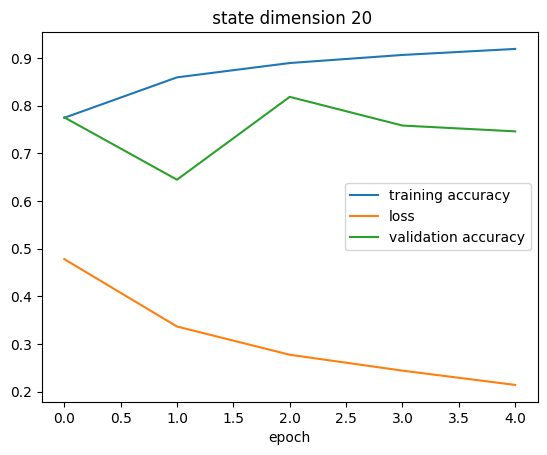

In [8]:
# Define Vanilla model with hyperparameter tuning
state_dim = 20
def build_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))
    model.add(SimpleRNN(units=hp.Choice('state_dim', values=[20]),dropout = hp.Choice("dropout", values=[0.0, 0.4, 0.5, 0.6])))
    model.add(Dense(units=1, activation='sigmoid'))

    # Hyperparameters to tune
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Initialize tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=6,  # You can increase this for a more exhaustive search
    executions_per_trial=1,
    directory='Vanilla_tuning20',
    project_name='Vanilla_hyperparameter_tuning'
)

# Perform hyperparameter tuning
tuner.search(X_train_pad, y_train, epochs=5, validation_split=0.2)
tuner.results_summary()
print("\n********************************************************************************\n")


# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model_simplernn_tuned = tuner.hypermodel.build(best_hps)

history = History()
# Train the model
model_simplernn_tuned.fit(X_train_pad, y_train, epochs=5, validation_split=0.2,callbacks = [history])

# Evaluate on test set
test_results_tuned = model_simplernn_tuned.evaluate(X_test_pad, y_test)
print(f'Test Loss: {test_results_tuned[0]}, Test Accuracy: {test_results_tuned[1]}')
Vanilla_accuracy.append(test_results_tuned[1])
Vanilla_loss.append(test_results_tuned[0])
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_accuracy'],label = 'validation accuracy')
textfortitle = " state dimension " + str(state_dim)
plt.title(textfortitle)
plt.xlabel('epoch')
plt.legend()

## State dim = 50

Trial 6 Complete [00h 00m 53s]
val_accuracy: 0.8014000058174133

Best val_accuracy So Far: 0.8399999737739563
Total elapsed time: 00h 05m 18s
Results summary
Results in Vanilla_tuning50\Vanilla_hyperparameter_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
state_dim: 50
dropout: 0.6
learning_rate: 0.0001
Score: 0.8399999737739563

Trial 5 summary
Hyperparameters:
state_dim: 50
dropout: 0.0
learning_rate: 0.0001
Score: 0.8014000058174133

Trial 2 summary
Hyperparameters:
state_dim: 50
dropout: 0.5
learning_rate: 0.001
Score: 0.7853999733924866

Trial 4 summary
Hyperparameters:
state_dim: 50
dropout: 0.0
learning_rate: 0.001
Score: 0.7576000094413757

Trial 3 summary
Hyperparameters:
state_dim: 50
dropout: 0.6
learning_rate: 0.01
Score: 0.6725999712944031

Trial 0 summary
Hyperparameters:
state_dim: 50
dropout: 0.5
learning_rate: 0.01
Score: 0.5508000254631042

****************************************************************

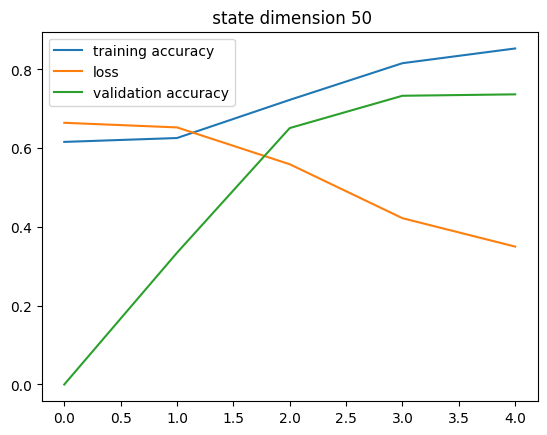

In [9]:
# Define Vanilla model with hyperparameter tuning
state_dim = 50
def build_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))
    model.add(SimpleRNN(units=hp.Choice('state_dim', values=[50]),dropout = hp.Choice("dropout", values=[0.0, 0.4, 0.5, 0.6])))
    model.add(Dense(units=1, activation='sigmoid'))

    # Hyperparameters to tune
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Initialize tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=6,  # You can increase this for a more exhaustive search
    executions_per_trial=1,
    directory='Vanilla_tuning50',
    project_name='Vanilla_hyperparameter_tuning'
)

# Perform hyperparameter tuning
tuner.search(X_train_pad, y_train, epochs=5, validation_split=0.2)
tuner.results_summary()
print("\n********************************************************************************\n")


# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model_simplernn_tuned = tuner.hypermodel.build(best_hps)

history = History()
# Train the model
model_simplernn_tuned.fit(X_train_pad, y_train, epochs=5, validation_split=0.2,callbacks = [history])

# Evaluate on test set
test_results_tuned = model_simplernn_tuned.evaluate(X_test_pad, y_test)
print(f'Test Loss: {test_results_tuned[0]}, Test Accuracy: {test_results_tuned[1]}')
Vanilla_accuracy.append(test_results_tuned[1])
Vanilla_loss.append(test_results_tuned[0])
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_accuracy'],label = 'validation accuracy')
textfortitle = " state dimension " + str(state_dim)
plt.title(textfortitle)
plt.legend()

## State dim = 100

Trial 6 Complete [00h 01m 04s]
val_accuracy: 0.6948000192642212

Best val_accuracy So Far: 0.7979999780654907
Total elapsed time: 00h 06m 58s
Results summary
Results in Vanilla_tuning100\Vanilla_hyperparameter_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 4 summary
Hyperparameters:
state_dim: 100
dropout: 0.6
learning_rate: 0.001
Score: 0.7979999780654907

Trial 0 summary
Hyperparameters:
state_dim: 100
dropout: 0.4
learning_rate: 0.0001
Score: 0.7857999801635742

Trial 5 summary
Hyperparameters:
state_dim: 100
dropout: 0.6
learning_rate: 0.0001
Score: 0.6948000192642212

Trial 1 summary
Hyperparameters:
state_dim: 100
dropout: 0.6
learning_rate: 0.01
Score: 0.510200023651123

Trial 2 summary
Hyperparameters:
state_dim: 100
dropout: 0.0
learning_rate: 0.01
Score: 0.43059998750686646

Trial 3 summary
Hyperparameters:
state_dim: 100
dropout: 0.4
learning_rate: 0.01
Score: 0.420199990272522

***********************************************************

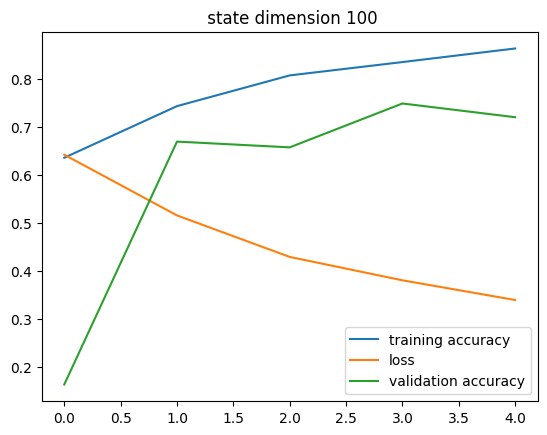

In [10]:
# Define Vanilla model with hyperparameter tuning
state_dim = 100
def build_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))
    model.add(SimpleRNN(units=hp.Choice('state_dim', values=[100]),dropout = hp.Choice("dropout", values=[0.0, 0.4, 0.5, 0.6])))
    model.add(Dense(units=1, activation='sigmoid'))

    # Hyperparameters to tune
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Initialize tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=6,  # You can increase this for a more exhaustive search
    executions_per_trial=1,
    directory='Vanilla_tuning100',
    project_name='Vanilla_hyperparameter_tuning'
)

# Perform hyperparameter tuning
tuner.search(X_train_pad, y_train, epochs=5, validation_split=0.2)
tuner.results_summary()
print("\n********************************************************************************\n")


# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model_simplernn_tuned = tuner.hypermodel.build(best_hps)

history = History()
# Train the model
model_simplernn_tuned.fit(X_train_pad, y_train, epochs=5, validation_split=0.2,callbacks = [history])

# Evaluate on test set
test_results_tuned = model_simplernn_tuned.evaluate(X_test_pad, y_test)
print(f'Test Loss: {test_results_tuned[0]}, Test Accuracy: {test_results_tuned[1]}')
Vanilla_accuracy.append(test_results_tuned[1])
Vanilla_loss.append(test_results_tuned[0])
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_accuracy'],label = 'validation accuracy')
textfortitle = " state dimension " + str(state_dim)
plt.title(textfortitle)
plt.legend()

## State dim = 200

Trial 6 Complete [00h 02m 20s]
val_accuracy: 0.8274000287055969

Best val_accuracy So Far: 0.8274000287055969
Total elapsed time: 00h 13m 57s
Results summary
Results in Vanilla_tuning200\Vanilla_hyperparameter_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 5 summary
Hyperparameters:
state_dim: 200
dropout: 0.0
learning_rate: 0.0001
Score: 0.8274000287055969

Trial 0 summary
Hyperparameters:
state_dim: 200
dropout: 0.6
learning_rate: 0.0001
Score: 0.7954000234603882

Trial 4 summary
Hyperparameters:
state_dim: 200
dropout: 0.5
learning_rate: 0.0001
Score: 0.7793999910354614

Trial 3 summary
Hyperparameters:
state_dim: 200
dropout: 0.6
learning_rate: 0.001
Score: 0.7391999959945679

Trial 1 summary
Hyperparameters:
state_dim: 200
dropout: 0.4
learning_rate: 0.001
Score: 0.7287999987602234

Trial 2 summary
Hyperparameters:
state_dim: 200
dropout: 0.5
learning_rate: 0.001
Score: 0.5633999705314636

******************************************************

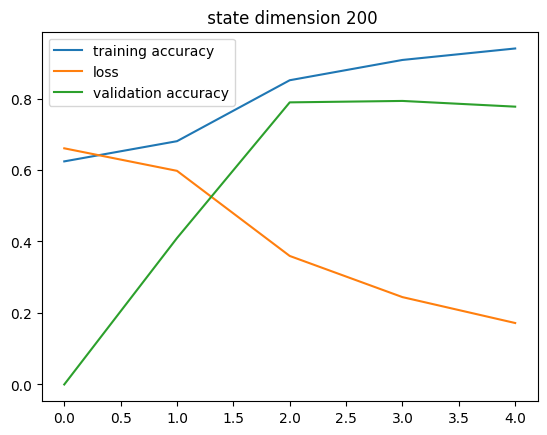

In [11]:
# Define Vanilla model with hyperparameter tuning
state_dim = 200
def build_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))
    model.add(SimpleRNN(units=hp.Choice('state_dim', values=[200]),dropout = hp.Choice("dropout", values=[0.0, 0.4, 0.5, 0.6])))
    model.add(Dense(units=1, activation='sigmoid'))

    # Hyperparameters to tune
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Initialize tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=6,  # You can increase this for a more exhaustive search
    executions_per_trial=1,
    directory='Vanilla_tuning200',
    project_name='Vanilla_hyperparameter_tuning'
)

# Perform hyperparameter tuning
tuner.search(X_train_pad, y_train, epochs=5, validation_split=0.2)
tuner.results_summary()
print("\n********************************************************************************\n")


# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model_simplernn_tuned = tuner.hypermodel.build(best_hps)

history = History()
# Train the model
model_simplernn_tuned.fit(X_train_pad, y_train, epochs=5, validation_split=0.2,callbacks = [history])

# Evaluate on test set
test_results_tuned = model_simplernn_tuned.evaluate(X_test_pad, y_test)
print(f'Test Loss: {test_results_tuned[0]}, Test Accuracy: {test_results_tuned[1]}')
Vanilla_accuracy.append(test_results_tuned[1])
Vanilla_loss.append(test_results_tuned[0])
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_accuracy'],label = 'validation accuracy')
textfortitle = " state dimension " + str(state_dim)
plt.title(textfortitle)
plt.legend()

## State dim = 500

Trial 6 Complete [00h 06m 19s]
val_accuracy: 0.6359999775886536

Best val_accuracy So Far: 0.7946000099182129
Total elapsed time: 00h 36m 57s
Results summary
Results in Vanilla_tuning500\Vanilla_hyperparameter_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 4 summary
Hyperparameters:
state_dim: 500
dropout: 0.0
learning_rate: 0.001
Score: 0.7946000099182129

Trial 2 summary
Hyperparameters:
state_dim: 500
dropout: 0.0
learning_rate: 0.01
Score: 0.7193999886512756

Trial 5 summary
Hyperparameters:
state_dim: 500
dropout: 0.0
learning_rate: 0.0001
Score: 0.6359999775886536

Trial 0 summary
Hyperparameters:
state_dim: 500
dropout: 0.4
learning_rate: 0.0001
Score: 0.2874000072479248

Trial 3 summary
Hyperparameters:
state_dim: 500
dropout: 0.5
learning_rate: 0.001
Score: 0.2168000042438507

Trial 1 summary
Hyperparameters:
state_dim: 500
dropout: 0.4
learning_rate: 0.001
Score: 0.18379999697208405

*******************************************************

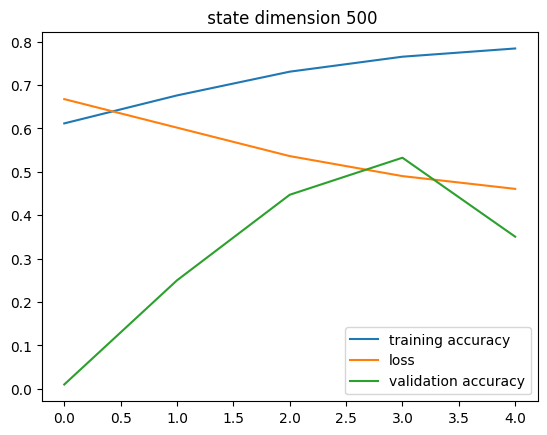

In [12]:
# Define Vanilla model with hyperparameter tuning
state_dim = 500
def build_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))
    model.add(SimpleRNN(units=hp.Choice('state_dim', values=[500]),dropout = hp.Choice("dropout", values=[0.0, 0.4, 0.5, 0.6])))
    model.add(Dense(units=1, activation='sigmoid'))

    # Hyperparameters to tune
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Initialize tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=6,  # You can increase this for a more exhaustive search
    executions_per_trial=1,
    directory='Vanilla_tuning500',
    project_name='Vanilla_hyperparameter_tuning'
)

# Perform hyperparameter tuning
tuner.search(X_train_pad, y_train, epochs=5, validation_split=0.2)
tuner.results_summary()
print("\n********************************************************************************\n")


# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model_simplernn_tuned = tuner.hypermodel.build(best_hps)

history = History()
# Train the model
model_simplernn_tuned.fit(X_train_pad, y_train, epochs=5, validation_split=0.2,callbacks = [history])

# Evaluate on test set
test_results_tuned = model_simplernn_tuned.evaluate(X_test_pad, y_test)
print(f'Test Loss: {test_results_tuned[0]}, Test Accuracy: {test_results_tuned[1]}')
Vanilla_accuracy.append(test_results_tuned[1])
Vanilla_loss.append(test_results_tuned[0])
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_accuracy'],label = 'validation accuracy')
textfortitle = " state dimension " + str(state_dim)
plt.title(textfortitle)
plt.legend()

# LSTM

In [13]:
LSTM_accuracy = []
LSTM_loss = []

## State dim = 20

Reloading Tuner from lstm_tuning20\lstm_hyperparameter_tuning\tuner0.json
Results summary
Results in lstm_tuning20\lstm_hyperparameter_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 3 summary
Hyperparameters:
state_dim: 20
dropout: 0.5
learning_rate: 0.0001
Score: 0.8410000205039978

Trial 5 summary
Hyperparameters:
state_dim: 20
dropout: 0.5
learning_rate: 0.001
Score: 0.8321999907493591

Trial 2 summary
Hyperparameters:
state_dim: 20
dropout: 0.0
learning_rate: 0.0001
Score: 0.8285999894142151

Trial 0 summary
Hyperparameters:
state_dim: 20
dropout: 0.5
learning_rate: 0.01
Score: 0.8144000172615051

Trial 4 summary
Hyperparameters:
state_dim: 20
dropout: 0.6
learning_rate: 0.0001
Score: 0.8098000288009644

Trial 1 summary
Hyperparameters:
state_dim: 20
dropout: 0.4
learning_rate: 0.001
Score: 0.7886000275611877

********************************************************************************

Epoch 1/5
625/625 [==============================] - 1

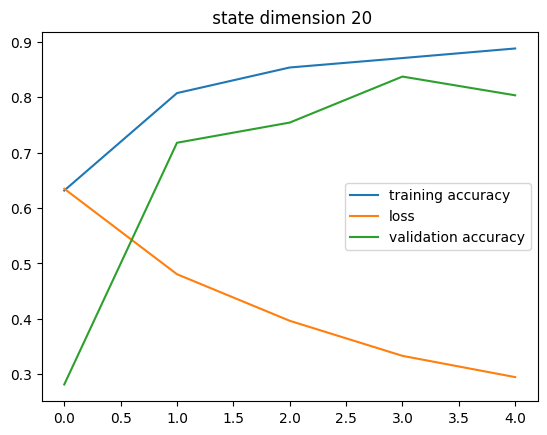

In [14]:
# Define LSTM model with hyperparameter tuning
state_dim = 20
def build_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))
    model.add(LSTM(units=hp.Choice('state_dim', values=[20]),dropout = hp.Choice("dropout", values=[0.0, 0.4, 0.5, 0.6])))
    model.add(Dense(units=1, activation='sigmoid'))

    # Hyperparameters to tune
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Initialize tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=6,  # You can increase this for a more exhaustive search
    executions_per_trial=1,
    directory='lstm_tuning20',
    project_name='lstm_hyperparameter_tuning'
)

# Perform hyperparameter tuning
tuner.search(X_train_pad, y_train, epochs=5, validation_split=0.2)
tuner.results_summary()
print("\n********************************************************************************\n")


# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model_lstm_tuned = tuner.hypermodel.build(best_hps)

history = History()
# Train the model
model_lstm_tuned.fit(X_train_pad, y_train, epochs=5, validation_split=0.2,callbacks = [history])

# Evaluate on test set
test_results_tuned = model_lstm_tuned.evaluate(X_test_pad, y_test)
print(f'Test Loss: {test_results_tuned[0]}, Test Accuracy: {test_results_tuned[1]}')
LSTM_accuracy.append(test_results_tuned[1])
LSTM_loss.append(test_results_tuned[0])
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_accuracy'],label = 'validation accuracy')
textfortitle = " state dimension " + str(state_dim)
plt.title(textfortitle)
plt.legend()

## State dim = 50

Reloading Tuner from lstm_tuning50\lstm_hyperparameter_tuning\tuner0.json
Results summary
Results in lstm_tuning50\lstm_hyperparameter_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 5 summary
Hyperparameters:
state_dim: 50
dropout: 0.6
learning_rate: 0.001
Score: 0.8769999742507935

Trial 2 summary
Hyperparameters:
state_dim: 50
dropout: 0.4
learning_rate: 0.01
Score: 0.8766000270843506

Trial 0 summary
Hyperparameters:
state_dim: 50
dropout: 0.5
learning_rate: 0.001
Score: 0.8632000088691711

Trial 4 summary
Hyperparameters:
state_dim: 50
dropout: 0.5
learning_rate: 0.01
Score: 0.8453999757766724

Trial 1 summary
Hyperparameters:
state_dim: 50
dropout: 0.5
learning_rate: 0.0001
Score: 0.8077999949455261

Trial 3 summary
Hyperparameters:
state_dim: 50
dropout: 0.6
learning_rate: 0.01
Score: 0.8062000274658203

********************************************************************************

Epoch 1/5
625/625 [==============================] - 22s 3

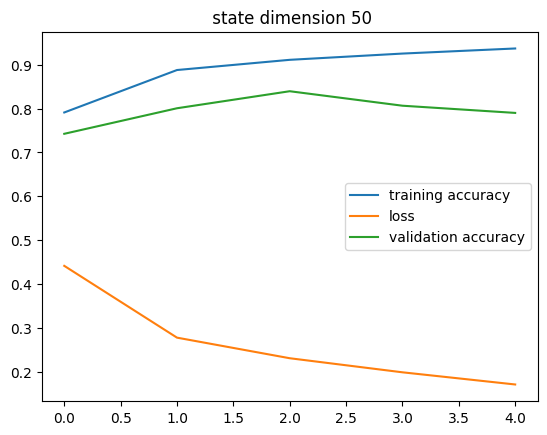

In [15]:
# Define LSTM model with hyperparameter tuning
state_dim = 50
def build_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))
    model.add(LSTM(units=hp.Choice('state_dim', values=[50]),dropout = hp.Choice("dropout", values=[0.0, 0.4, 0.5, 0.6])))
    model.add(Dense(units=1, activation='sigmoid'))

    # Hyperparameters to tune
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Initialize tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=6,  # You can increase this for a more exhaustive search
    executions_per_trial=1,
    directory='lstm_tuning50',
    project_name='lstm_hyperparameter_tuning'
)

# Perform hyperparameter tuning
tuner.search(X_train_pad, y_train, epochs=5, validation_split=0.2)
tuner.results_summary()
print("\n********************************************************************************\n")


# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model_lstm_tuned = tuner.hypermodel.build(best_hps)

history = History()
# Train the model
model_lstm_tuned.fit(X_train_pad, y_train, epochs=5, validation_split=0.2,callbacks = [history])

# Evaluate on test set
test_results_tuned = model_lstm_tuned.evaluate(X_test_pad, y_test)
print(f'Test Loss: {test_results_tuned[0]}, Test Accuracy: {test_results_tuned[1]}')
LSTM_accuracy.append(test_results_tuned[1])
LSTM_loss.append(test_results_tuned[0])
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_accuracy'],label = 'validation accuracy')
textfortitle = " state dimension " + str(state_dim)
plt.title(textfortitle)
plt.legend()

## State dim = 100

Reloading Tuner from lstm_tuning100\lstm_hyperparameter_tuning\tuner0.json
Results summary
Results in lstm_tuning100\lstm_hyperparameter_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 4 summary
Hyperparameters:
state_dim: 100
dropout: 0.5
learning_rate: 0.0001
Score: 0.842199981212616

Trial 1 summary
Hyperparameters:
state_dim: 100
dropout: 0.6
learning_rate: 0.0001
Score: 0.8352000117301941

Trial 5 summary
Hyperparameters:
state_dim: 100
dropout: 0.0
learning_rate: 0.001
Score: 0.8281999826431274

Trial 3 summary
Hyperparameters:
state_dim: 100
dropout: 0.4
learning_rate: 0.01
Score: 0.8198000192642212

Trial 2 summary
Hyperparameters:
state_dim: 100
dropout: 0.0
learning_rate: 0.0001
Score: 0.8154000043869019

Trial 0 summary
Hyperparameters:
state_dim: 100
dropout: 0.4
learning_rate: 0.001
Score: 0.800599992275238

********************************************************************************

Epoch 1/5
625/625 [=============================

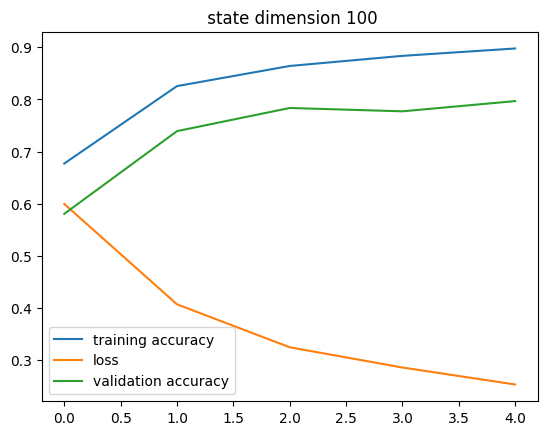

In [16]:
# Define LSTM model with hyperparameter tuning
state_dim = 100
def build_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))
    model.add(LSTM(units=hp.Choice('state_dim', values=[100]),dropout = hp.Choice("dropout", values=[0.0, 0.4, 0.5, 0.6])))
    model.add(Dense(units=1, activation='sigmoid'))

    # Hyperparameters to tune
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Initialize tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=6,  # You can increase this for a more exhaustive search
    executions_per_trial=1,
    directory='lstm_tuning100',
    project_name='lstm_hyperparameter_tuning'
)

# Perform hyperparameter tuning
tuner.search(X_train_pad, y_train, epochs=5, validation_split=0.2)
tuner.results_summary()
print("\n********************************************************************************\n")


# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model_lstm_tuned = tuner.hypermodel.build(best_hps)

history = History()
# Train the model
model_lstm_tuned.fit(X_train_pad, y_train, epochs=5, validation_split=0.2,callbacks = [history])

# Evaluate on test set
test_results_tuned = model_lstm_tuned.evaluate(X_test_pad, y_test)
print(f'Test Loss: {test_results_tuned[0]}, Test Accuracy: {test_results_tuned[1]}')
LSTM_accuracy.append(test_results_tuned[1])
LSTM_loss.append(test_results_tuned[0])
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_accuracy'],label = 'validation accuracy')
textfortitle = " state dimension " + str(state_dim)
plt.title(textfortitle)
plt.legend()

## State dim = 200

Reloading Tuner from lstm_tuning200\lstm_hyperparameter_tuning\tuner0.json
Results summary
Results in lstm_tuning200\lstm_hyperparameter_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
state_dim: 200
dropout: 0.0
learning_rate: 0.001
Score: 0.8450000286102295

Trial 5 summary
Hyperparameters:
state_dim: 200
dropout: 0.4
learning_rate: 0.0001
Score: 0.8203999996185303

Trial 1 summary
Hyperparameters:
state_dim: 200
dropout: 0.6
learning_rate: 0.001
Score: 0.8105999827384949

Trial 4 summary
Hyperparameters:
state_dim: 200
dropout: 0.5
learning_rate: 0.01
Score: 0.8091999888420105

Trial 3 summary
Hyperparameters:
state_dim: 200
dropout: 0.5
learning_rate: 0.0001
Score: 0.7871999740600586

Trial 2 summary
Hyperparameters:
state_dim: 200
dropout: 0.4
learning_rate: 0.001
Score: 0.781000018119812

********************************************************************************

Epoch 1/5
625/625 [=============================

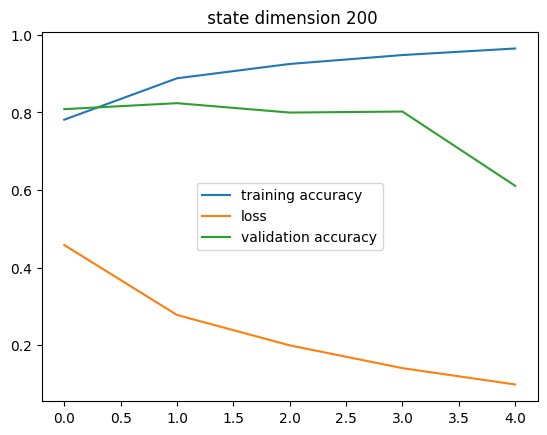

In [17]:
# Define LSTM model with hyperparameter tuning
state_dim = 200
def build_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))
    model.add(LSTM(units=hp.Choice('state_dim', values=[200]),dropout = hp.Choice("dropout", values=[0.0, 0.4, 0.5, 0.6])))
    model.add(Dense(units=1, activation='sigmoid'))

    # Hyperparameters to tune
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Initialize tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=6,  # You can increase this for a more exhaustive search
    executions_per_trial=1,
    directory='lstm_tuning200',
    project_name='lstm_hyperparameter_tuning'
)

# Perform hyperparameter tuning
tuner.search(X_train_pad, y_train, epochs=5, validation_split=0.2)
tuner.results_summary()
print("\n********************************************************************************\n")


# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model_lstm_tuned = tuner.hypermodel.build(best_hps)

history = History()
# Train the model
model_lstm_tuned.fit(X_train_pad, y_train, epochs=5, validation_split=0.2,callbacks = [history])

# Evaluate on test set
test_results_tuned = model_lstm_tuned.evaluate(X_test_pad, y_test)
print(f'Test Loss: {test_results_tuned[0]}, Test Accuracy: {test_results_tuned[1]}')
LSTM_accuracy.append(test_results_tuned[1])
LSTM_loss.append(test_results_tuned[0])
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_accuracy'],label = 'validation accuracy')
textfortitle = " state dimension " + str(state_dim)
plt.title(textfortitle)
plt.legend()

## State dim = 500

Reloading Tuner from lstm_tuning500\lstm_hyperparameter_tuning\tuner0.json
Results summary
Results in lstm_tuning500\lstm_hyperparameter_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 3 summary
Hyperparameters:
state_dim: 500
dropout: 0.0
learning_rate: 0.0001
Score: 0.8528000116348267

Trial 2 summary
Hyperparameters:
state_dim: 500
dropout: 0.5
learning_rate: 0.0001
Score: 0.8446000218391418

Trial 1 summary
Hyperparameters:
state_dim: 500
dropout: 0.0
learning_rate: 0.001
Score: 0.8108000159263611

Trial 0 summary
Hyperparameters:
state_dim: 500
dropout: 0.4
learning_rate: 0.001
Score: 0.8058000206947327

Trial 4 summary
Hyperparameters:
state_dim: 500
dropout: 0.5
learning_rate: 0.01
Score: 0.7838000059127808

Trial 5 summary
Hyperparameters:
state_dim: 500
dropout: 0.4
learning_rate: 0.01
Score: 0.7174000144004822

********************************************************************************

Epoch 1/5
625/625 [=============================

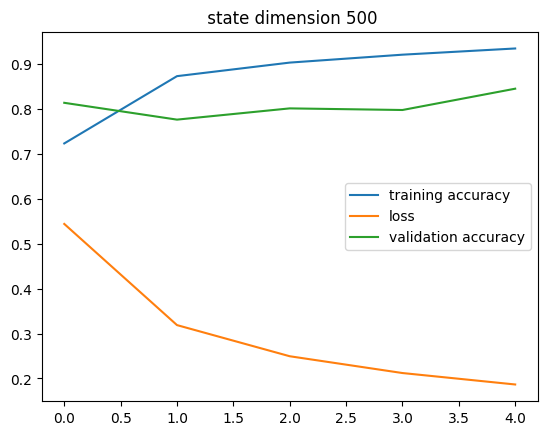

In [18]:
# Define LSTM model with hyperparameter tuning
state_dim = 500
def build_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=50, input_length=max_len))
    model.add(LSTM(units=hp.Choice('state_dim', values=[500]),dropout = hp.Choice("dropout", values=[0.0, 0.4, 0.5, 0.6])))
    model.add(Dense(units=1, activation='sigmoid'))

    # Hyperparameters to tune
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Initialize tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=6,  # You can increase this for a more exhaustive search
    executions_per_trial=1,
    directory='lstm_tuning500',
    project_name='lstm_hyperparameter_tuning'
)

# Perform hyperparameter tuning
tuner.search(X_train_pad, y_train, epochs=5, validation_split=0.2)
tuner.results_summary()
print("\n********************************************************************************\n")


# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model_lstm_tuned = tuner.hypermodel.build(best_hps)

history = History()
# Train the model
model_lstm_tuned.fit(X_train_pad, y_train, epochs=5, validation_split=0.2,callbacks = [history])

# Evaluate on test set
test_results_tuned = model_lstm_tuned.evaluate(X_test_pad, y_test)
print(f'Test Loss: {test_results_tuned[0]}, Test Accuracy: {test_results_tuned[1]}')
LSTM_accuracy.append(test_results_tuned[1])
LSTM_loss.append(test_results_tuned[0])
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_accuracy'],label = 'validation accuracy')
textfortitle = " state dimension " + str(state_dim)
plt.title(textfortitle)
plt.legend()

# Vanilla vs LSTM


In [19]:
dimensions = [20,50,100,200,500]

Text(0.5, 1.0, 'LSTM vs Vanilla accuracy')

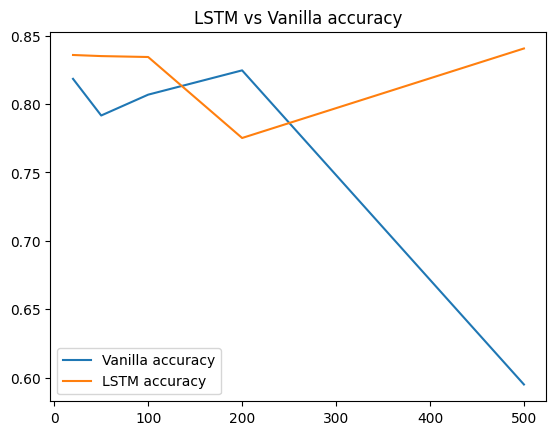

In [20]:
plt.plot(dimensions,Vanilla_accuracy,label='Vanilla accuracy')
plt.plot(dimensions,LSTM_accuracy,label = 'LSTM accuracy')
plt.legend()
plt.title('LSTM vs Vanilla accuracy')

Text(0.5, 1.0, 'LSTM vs Vanilla loss')

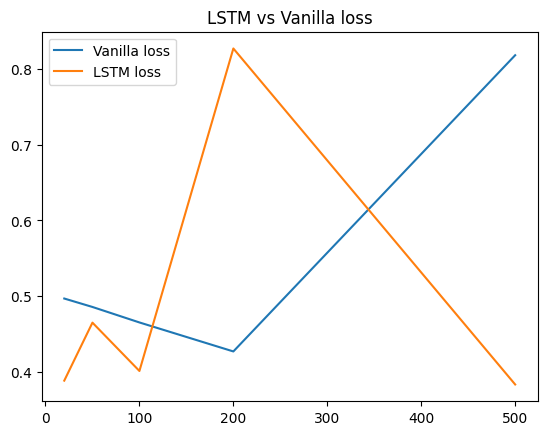

In [21]:
plt.plot(dimensions,Vanilla_loss,label='Vanilla loss')
plt.plot(dimensions,LSTM_loss,label = 'LSTM loss')
plt.legend()
plt.title('LSTM vs Vanilla loss')

Text(0, 0.5, 'Accuracy')

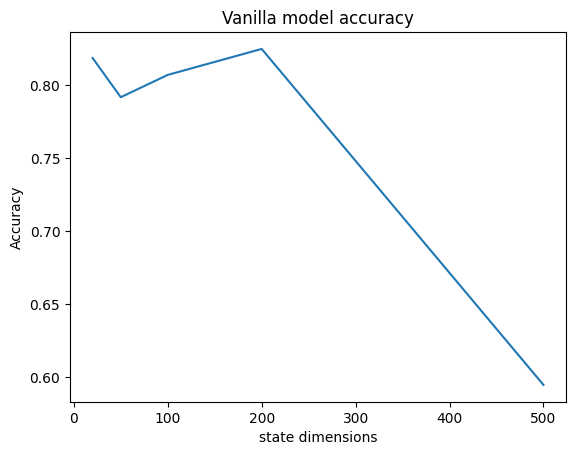

In [22]:
plt.plot(dimensions,Vanilla_accuracy)
plt.title("Vanilla model accuracy")
plt.xlabel('state dimensions')
plt.ylabel('Accuracy')